# **Desafio: Correlação e Regressão**

####Squad Jill Tarter



---



### Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression



---



### Abrindo e lendo o arquivo

Clicar no link e baixar o arquivo na sua máquina:

https://drive.google.com/file/d/1OzxOwyRw3hXY4LKr4iU6w5vShJ_jHk_Y/view?usp=sharing

In [ ]:
#Após rodar o código, clique em "Escolher arquivos" para importar o arquivo que você baixou
from google.colab import files
uploaded = files.upload()

Saving desafio_01_preco_imoveis.csv to desafio_01_preco_imoveis.csv




---



###Analisando o dataset

In [ ]:
df_imoveis = pd.read_csv('desafio_01_preco_imoveis.csv', sep = ',') #exibir o arquivo
df_imoveis.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [ ]:
df_imoveis.shape # função q retorna o data frame (n° de linhas e n° de colunas)

(21613, 19)

In [ ]:
df_imoveis.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [ ]:
df_imoveis.describe() # função q gera estatísticas descritivas p/ data frame

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


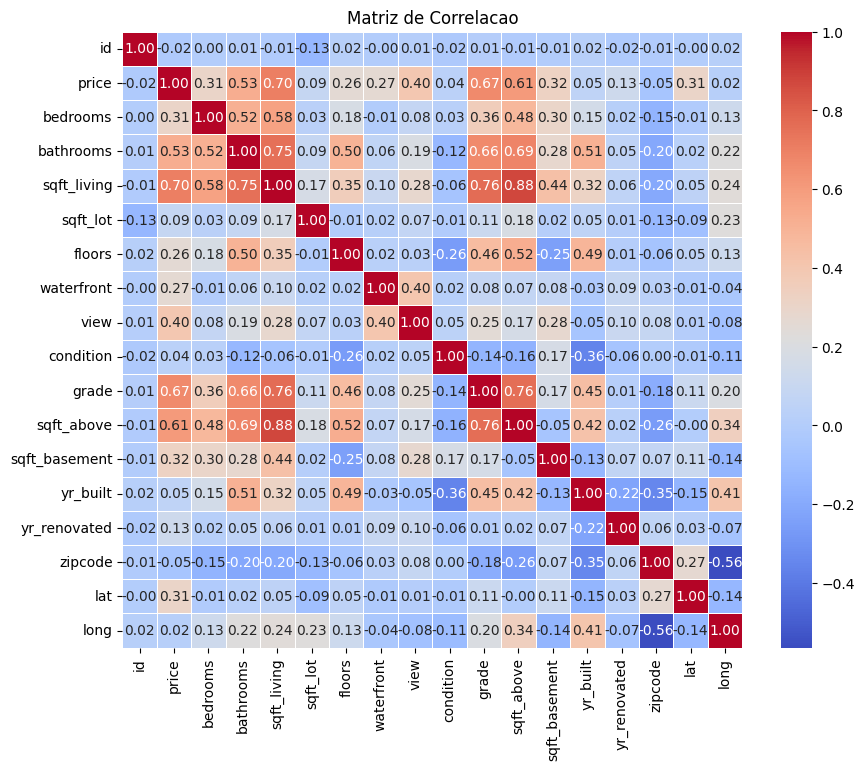

In [ ]:
#Matriz de correlação
corr = df_imoveis.select_dtypes(include=np.number).corr() # Seleciona apenas colunas numéricas

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacao')
plt.show()

##O mapa de calor gerado mostra a correlação entre cada par de variáveis numéricas do DataFrame.

#Valores próximos de 1 (vermelho) indicam uma correlação positiva forte,
#ou seja, as variáveis tendem a aumentar ou diminuir juntas.
#Valores próximos de -1 (azul) indicam uma correlação negativa forte,
#ou seja, quando uma variável aumenta, a outra tende a diminuir, e vice-versa.
#Valores próximos de 0(cinza) indicam uma correlação fraca ou inexistente entre as variáveis.
#Ao analisar o mapa de calor, você pode identificar quais variáveis têm maior
#influência sobre o preço do imóvel (price), por exemplo. As variáveis com correlação mais
 #forte (positiva ou negativa) com o preço são as mais importantes para a precificação do imóvel.



---



# Desafio: Análise de Correlação

Suponha que você trabalha em uma empresa do setor imobiliário. Para essa empresa é muito importante precificar corretamente o imóvel, caso contrário, os corretores podem perder a venda. Como parte do time de dados, você é responsável por analisar os principais fatores que podem afetar o preço dos imóveis. Para isso, eles te enviaram a base de dados (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?

A base de dados: desafio_01_preco_imoveis.csv contém as seguintes informações:

● id : código identificador do imóvel

● date: data em que o imóvel foi cadastrado

● price: preço do imóvel

● bedrooms: número de quartos

● bathrooms: número de banheiros

● sqft_living: tamanho do imóvel (dentro da casa)

● sqft_lot: tamanho do lote / terreno

● floors: andares

● waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso
contrário.

● view: indica o número de quartos com vista.

● condition: condição do imóvel, escala de 1 a 5

● grade: nota do imóvel

● sqft_above: tamanho da casa acima do solo (excluindo porão)

● sqft_basement: tamanho do porão

● yr_built: ano em que a casa foi construída

● yr_renovated: ano em que a casa foi renovada

● zipcode: "CEP" do imóvel

● lat: latitude do imóvel

● long: longitude do imóvel



---



###1- Analise a correlação de todas as variáveis com o preço do imóvel. Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?

In [ ]:
#Vamos calcular a correlação de todas as variáveis com o preço do imóvel

# Calcular a correlação com a variável 'price', excluindo colunas não numéricas
correlation_matrix = df_imoveis.select_dtypes(include=np.number).corr() # Seleciona apenas colunas numéricas
price_corr = correlation_matrix['price'].sort_values(ascending=False)

# Exibir as correlações
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [ ]:
# Calcular a correlação de todas as variáveis com a variável 'price', excluindo colunas não numéricas e a coluna 'date'
correlation_matrix = df_imoveis.drop(columns=['date']).select_dtypes(include=np.number).corr()

# Ordenar as correlações com a variável 'price'
price_corr = correlation_matrix['price'].sort_values(ascending=False)

# Exibir as 5 variáveis mais correlacionadas com 'price'
top_5_vars = price_corr.index[1:6]  # As 5 primeiras variáveis mais correlacionadas (excluindo o próprio 'price')
print(top_5_vars)

## tamanho do imovel,nota do imovel, tamanho da casa acima do solo, tamanho do banheiro e n° quartos c/ vista.

Index(['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view'], dtype='object')




---



###2- Para as top 5 variáveis mais correlacionadas com o preço:
a. plote as suas distribuições (histograma e boxplot)

b. plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a
variável correlacionada no eixo X.

c. para cada uma das 5 variáveis faça uma regressão linear simples sendo
preciso a variável resposta (y) e interprete os resultados.

In [ ]:
## Variáveis mais correlacionadas
top_5_vars = ['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view']

###a. plote as suas distribuições (histograma e boxplot)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


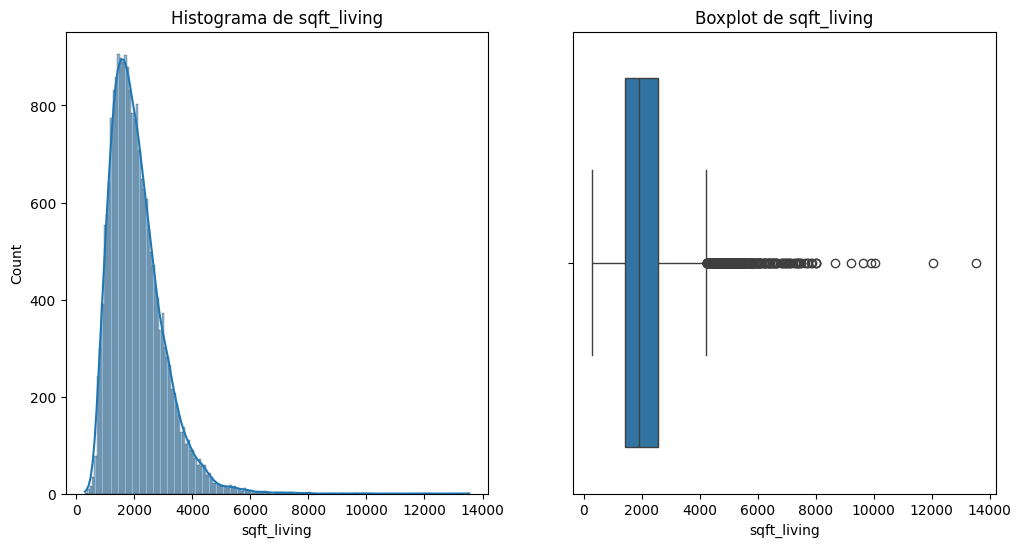

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


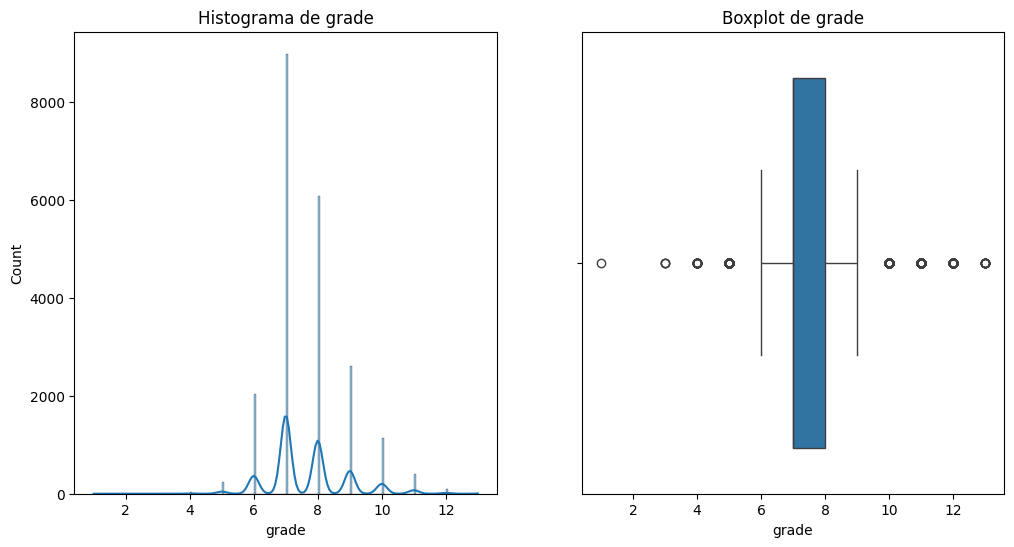

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


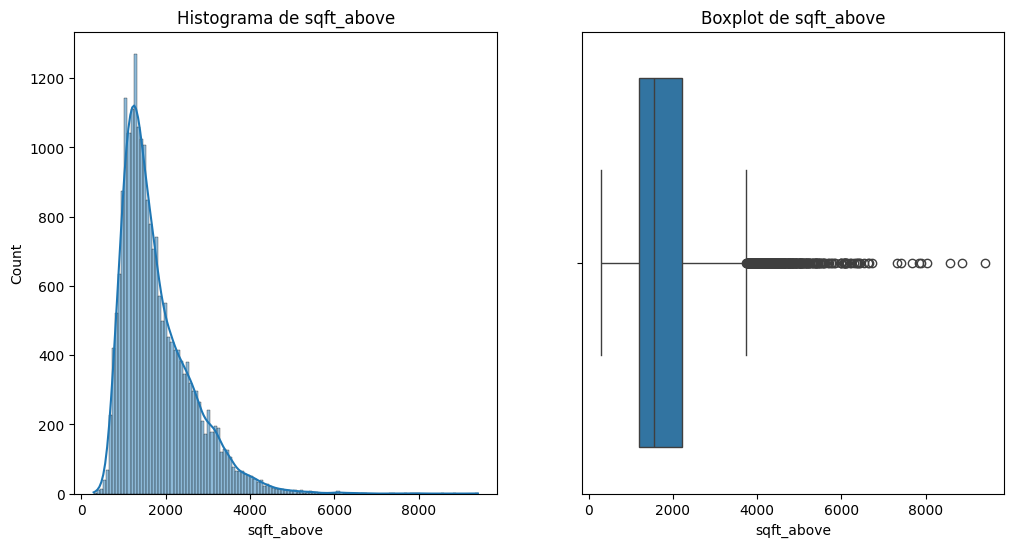

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


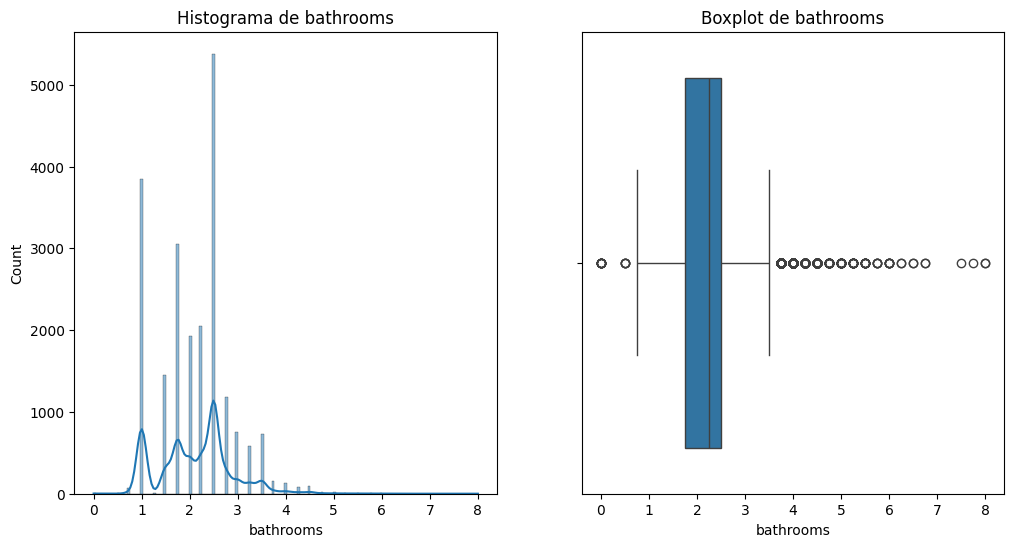

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


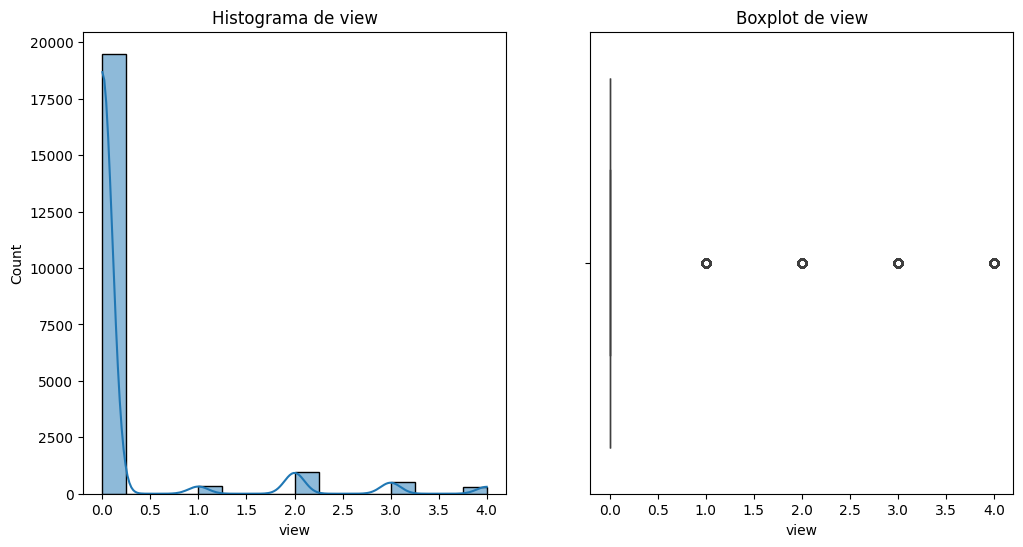

In [ ]:
# Histograma e boxplot para as 5 variáveis mais correlacionadas
for var in top_5_vars:
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df_imoveis[var], kde=True)
    plt.title(f'Histograma de {var}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_imoveis[var])
    plt.title(f'Boxplot de {var}')

    plt.show()

    ##Conclusão:

#Ao analisar os histogramas e boxplots gerados pelo código,
#você pode obter insights sobre a distribuição das variáveis mais correlacionadas com o preço do imóvel
#e identificar possíveis padrões ou anomalias nos dados



---



###b. plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a variável correlacionada no eixo X.

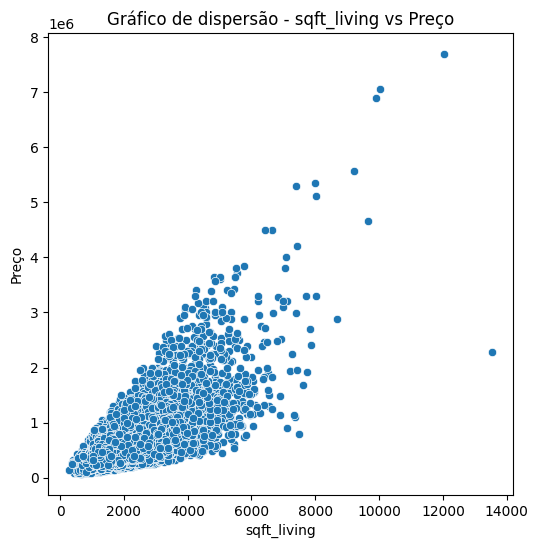

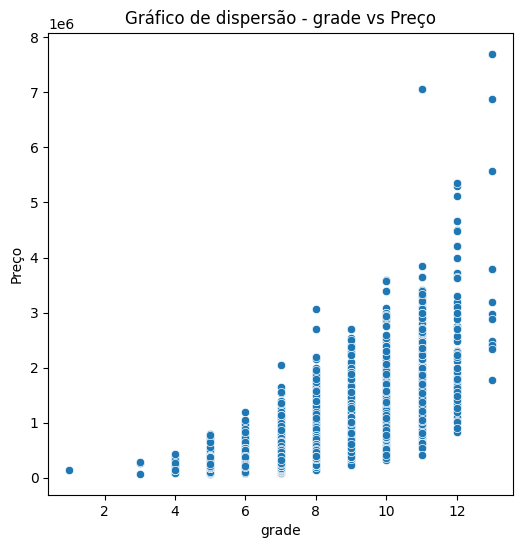

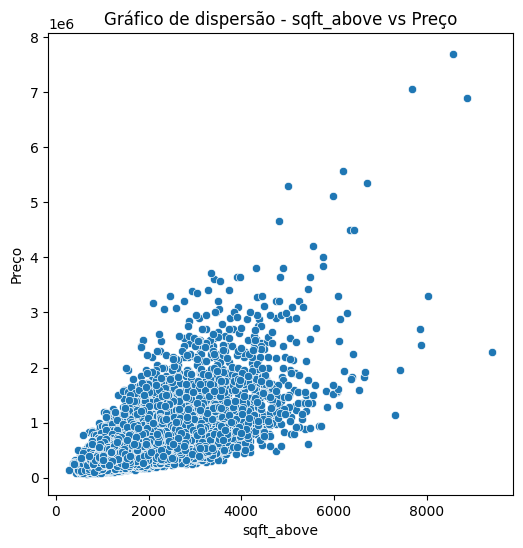

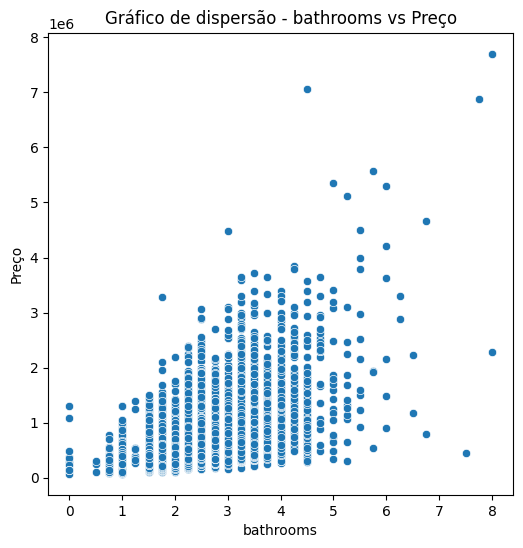

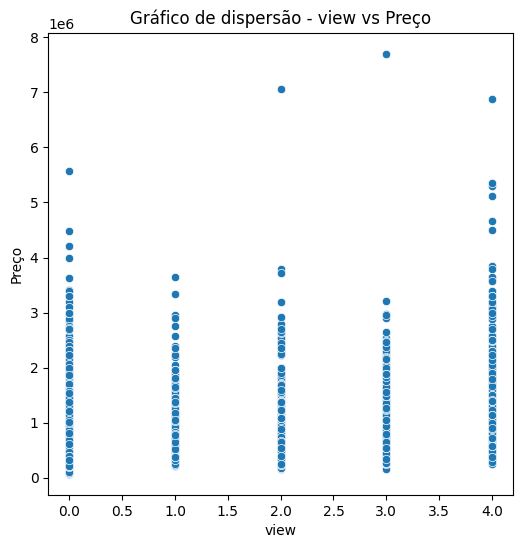

In [ ]:
# Gráfico de dispersão (scatterplot)
for var in top_5_vars:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=df_imoveis[var], y=df_imoveis['price'])
    plt.title(f'Gráfico de dispersão - {var} vs Preço')
    plt.xlabel(var)
    plt.ylabel('Preço')
    plt.show()

    ##Ao analisar os gráficos de dispersão gerados pelo código, você pode visualizar
    # a relação entre cada uma das 5 variáveis mais correlacionadas e o preço do imóvel,
    #identificando padrões, tendências e possíveis outliers.
    # Isso auxilia na compreensão dos fatores que influenciam o preço dos imóveis.




---



###c. para cada uma das 5 variáveis faça uma regressão linear simples sendo preciso a variável resposta (y) e interprete os resultados.

Regressão Linear Simples para sqft_living:
Coeficiente: 280.62356789744825
Intercepto: -43580.74309447396
R²: 0.4928532179037931
--------------------------------------------------


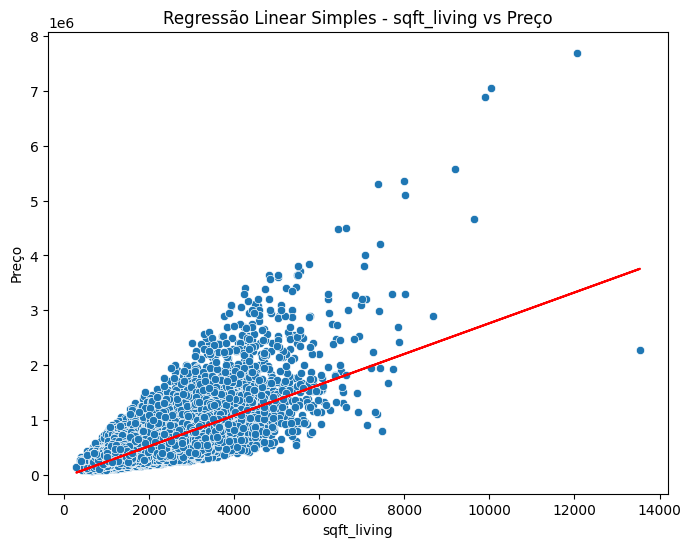

Regressão Linear Simples para grade:
Coeficiente: 208457.56245837914
Intercepto: -1056044.9770097742
R²: 0.44546848610928724
--------------------------------------------------


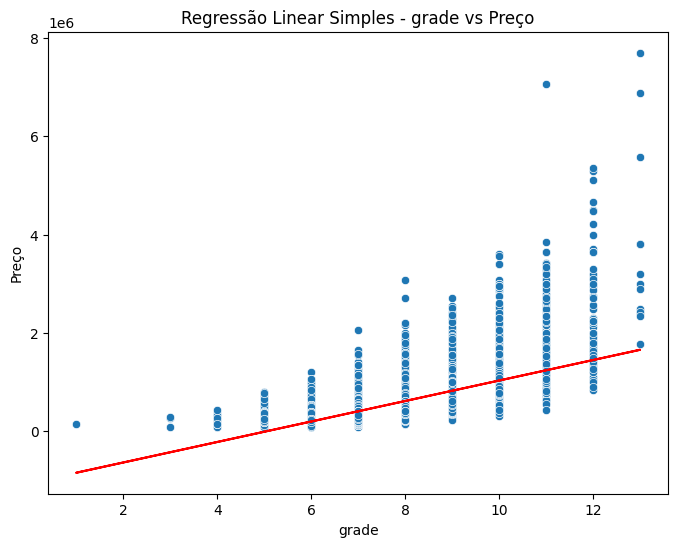

Regressão Linear Simples para sqft_above:
Coeficiente: 268.4731877618894
Intercepto: 59953.19204700063
R²: 0.36671175283827917
--------------------------------------------------


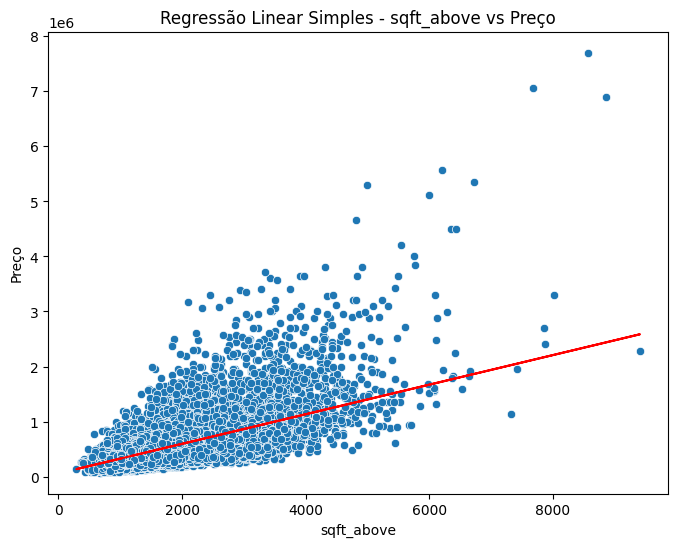

Regressão Linear Simples para bathrooms:
Coeficiente: 250326.51630210335
Intercepto: 10708.308530374663
R²: 0.27576939959239877
--------------------------------------------------


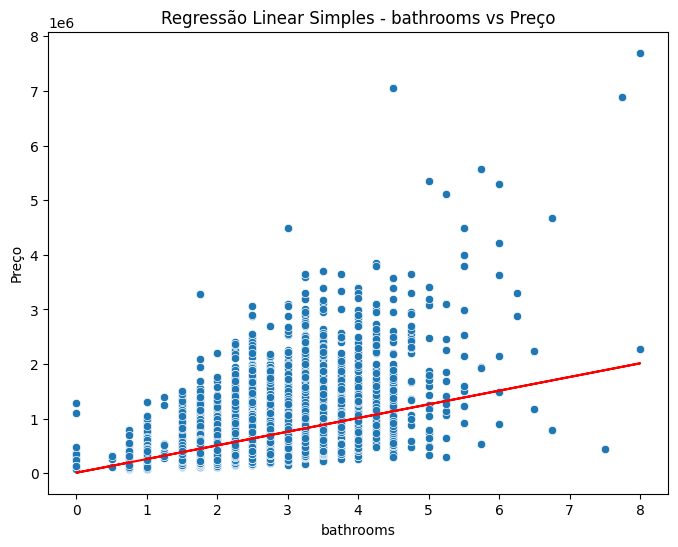

Regressão Linear Simples para view:
Coeficiente: 190335.24792684944
Intercepto: 495491.9406143726
R²: 0.15784211584121532
--------------------------------------------------


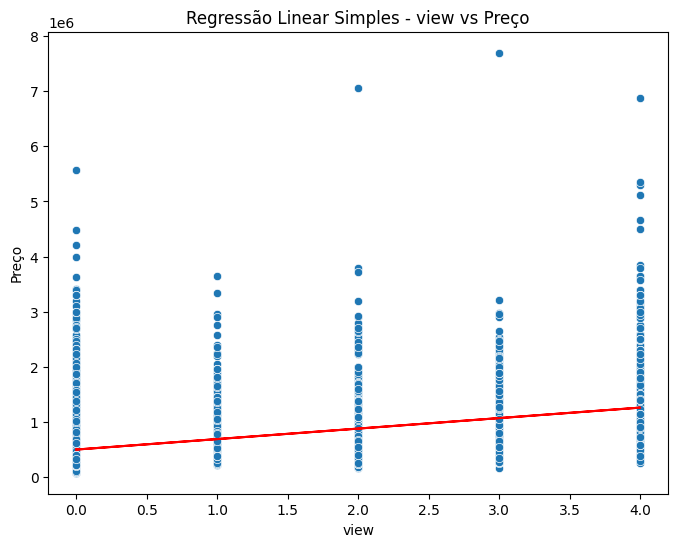

In [ ]:
# Regressão Linear Simples
# Para cada uma das 5 variáveis mais correlacionadas, faremos uma regressão linear simples.
# A variável resposta será o preço.



# Função para regressão linear simples e visualização dos resultados
def regressao_linear_simples(df_imoveis, var):
    X = df_imoveis[var].values.reshape(-1, 1)
    y = df_imoveis['price'].values

    # Criando o modelo de regressão linear
    model = LinearRegression()
    model.fit(X, y)

    # Coeficiente de regressão
    coef = model.coef_[0]
    intercept = model.intercept_

    # Exibir os resultados da regressão
    print(f'Regressão Linear Simples para {var}:')
    print(f'Coeficiente: {coef}')
    print(f'Intercepto: {intercept}')
    print(f'R²: {model.score(X, y)}')
    print('-' * 50)

    # Gráfico de dispersão com a linha de regressão
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_imoveis[var], y=y)
    plt.plot(df_imoveis[var], model.predict(X), color='red')
    plt.title(f'Regressão Linear Simples - {var} vs Preço')
    plt.xlabel(var)
    plt.ylabel('Preço')
    plt.show()

# Aplicar a regressão linear para as top 5 variáveis
for var in top_5_vars:
    regressao_linear_simples(df_imoveis, var)

    #A função regressao_linear_simples permite realizar uma regressão linear simples e
    # interpretar os resultados,
    #ajudando a entender a relação entre uma variável específica e o preço do imóvel.
